In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("salary_data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


SINCE OUR DATA IS SORTED (YEARS EXPERIENCE) SO WE NEED TO SHUFFLE IT 

In [5]:
data = data.sample(frac = 1)

In [6]:
data.head()

,YearsExperience,Salary
2,1.5,37731
20,6.8,91738
17,5.3,83088
1,1.3,46205
27,9.6,112635


SPLITTING THE DATA 

TRAINING DATA

In [7]:
data_train  = data.iloc[0 : 20 , [0 , 1]]

data_train.head()

,YearsExperience,Salary
2,1.5,37731
20,6.8,91738
17,5.3,83088
1,1.3,46205
27,9.6,112635


TEST DATA

In [8]:
data_test = data.iloc[20 : ]

In [9]:
data_test

,YearsExperience,Salary
9,3.7,57189
16,5.1,66029
12,4.0,56957
6,3.0,60150
5,2.9,56642
4,2.2,39891
18,5.9,81363
24,8.7,109431
19,6.0,93940
8,3.2,64445


ADDING ADDITIONAL COLUMNS REQUIRED FOR CALCULATING THE SLOPE AND INTERCEPT

In [10]:
data_train['(YearsExperience)^2'] = data_train['YearsExperience']**2

data_train['(Salary)^2'] = data_train['Salary']**2

data_train['YE * Salary'] = data_train['YearsExperience'] * data_train['Salary']

In [18]:
data_train.head()

,YearsExperience,Salary,(YearsExperience)^2,(Salary)^2,YE * Salary
2,1.5,37731,2.25,1423628361,56596.5
20,6.8,91738,46.24,8415860644,623818.4
17,5.3,83088,28.09,6903615744,440366.4
1,1.3,46205,1.69,2134902025,60066.5
27,9.6,112635,92.16,12686643225,1081296.0


REQUIREMENTS FOR THE SLOPE AND INTERCEPT

In [11]:
A = data_train['YearsExperience'].sum()

B = data_train['Salary'].sum()

In [12]:
x = data_train['(YearsExperience)^2'] .sum()

y = data_train['(Salary)^2'].sum()

z = data_train['YE * Salary'].sum()

SLOPE AND INTERCEPT

In [13]:
slope = ((20*z) - (A*B)) / ((20 * x) - (A*A))

intercept = ((B*x) - (A*z)) / ((20*x) - (A*A))

print('SLOPE : ' , slope , 'INTERCEPT : ' , intercept)

SLOPE :  9411.769575890059 INTERCEPT :  25726.151482270536


MAKING PREDICTION FOR THE TEST DATA 

In [14]:
data_test['Predicted Values'] = (slope * data_test['YearsExperience'] + intercept)

data_test

D:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,YearsExperience,Salary,Predicted Values
9,3.7,57189,60549.698913
16,5.1,66029,73726.176319
12,4.0,56957,63373.229786
6,3.0,60150,53961.460210
5,2.9,56642,53020.283252
4,2.2,39891,46432.044549
18,5.9,81363,81255.591980
24,8.7,109431,107608.546793
19,6.0,93940,82196.768938
8,3.2,64445,55843.814125


PLOTTING THE DATA

In [15]:
import matplotlib.pyplot as plt  

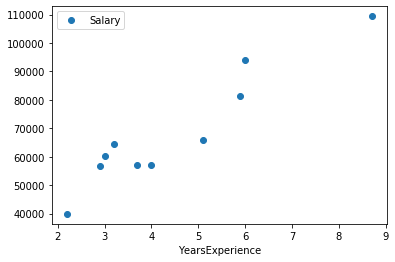

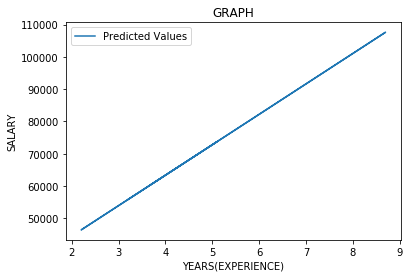

In [16]:
data_test.plot(x = 'YearsExperience' , y = 'Salary' , style = 'o')

data_test.plot(x = 'YearsExperience' , y = 'Predicted Values' , style = '-')

plt.title('GRAPH') 

plt.xlabel('YEARS(EXPERIENCE)')  

plt.ylabel('SALARY')  

plt.legend()

plt.show()

